Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

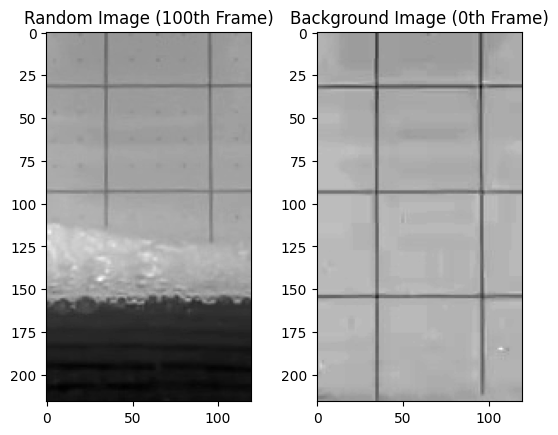

In [ ]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Largest Contour Size: 6826.0
Total Area: 25920
Percentage: 26.3 %


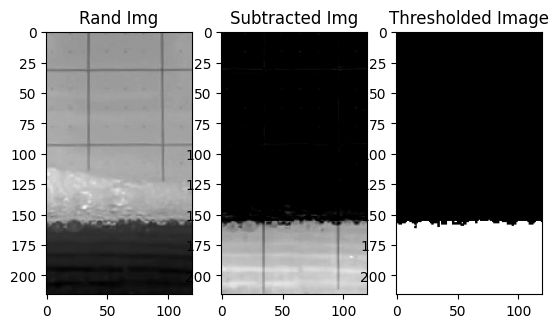

In [ ]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

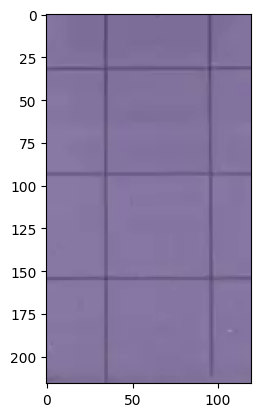

True

In [ ]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()



01.


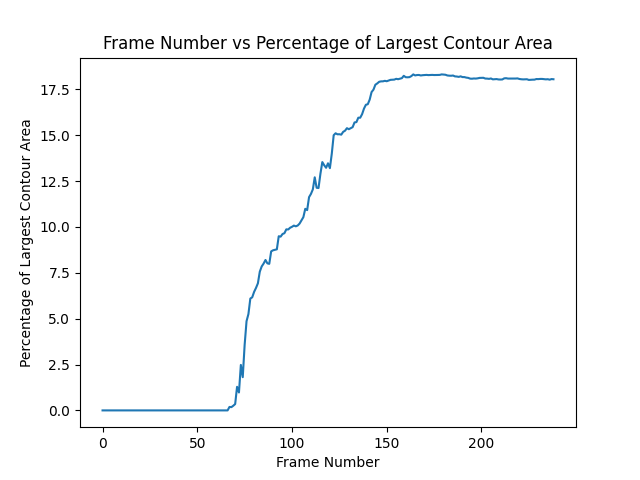

02.

Otsu's thresholding represents an automatic thresholding technique used in image processing to segment the foreground, or the object of interest, from the background. The technique calculates an optimum threshold value in a way that the inter-class variance (variance between the foreground and background) is maximized and the intra-class variance (variance within each class) is minimized.

The method works effectively if the image histogram is bimodal-a pattern showing two distinct peaks in the foreground and background. In any other case, with noisy images without clear bimodal histograms, Otsu's technique gives suboptimal thresholds because of its error-prone methods for segmenting an image.

Key procedures involved in the Otsu thresholding are:
1. Calculation of the histogram.
2. Total mean and variance determination of an image.
3. Run a loop through all possible threshold values to calculate the inter-class variance.
4. Choose the threshold for which the inter-class variance is maximum.

This thresholding technique has been widely used because it is fast and no selection of threshold by hand is needed.

03.

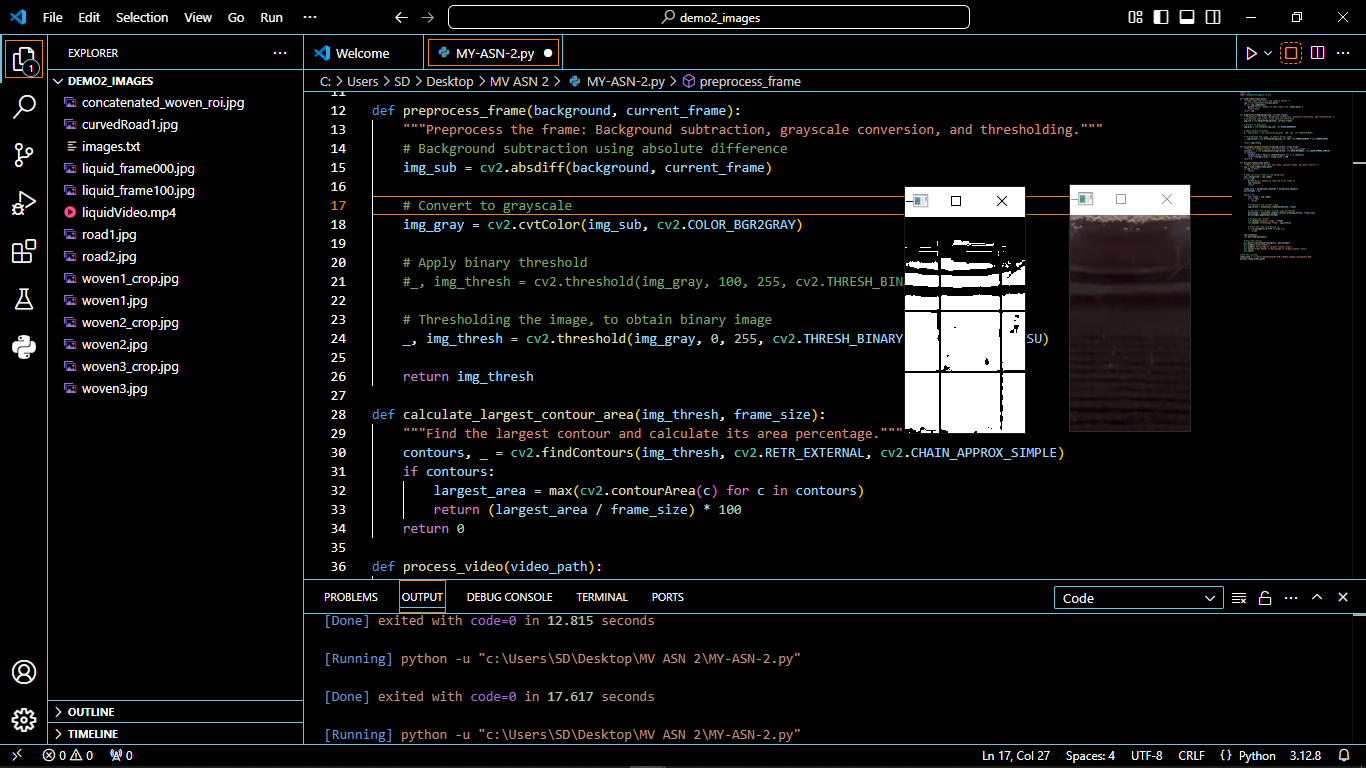

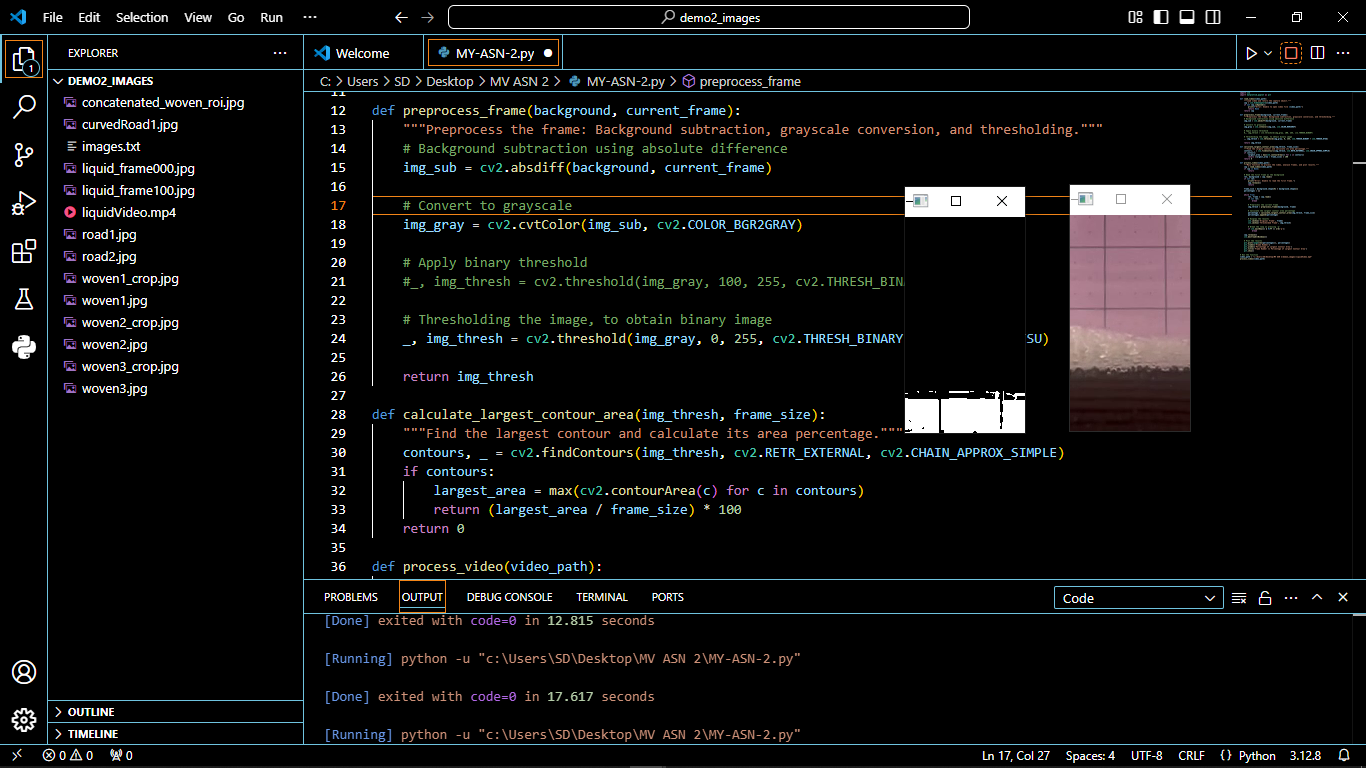

04.

The algorithm developed to analyze the liquid level in a video follows these systematic steps:

Video Loading:

The video file is loaded using OpenCV's VideoCapture function.
The first frame of the video is extracted to serve as the background reference.
Preprocessing Each Frame:

Background Subtraction:
Each subsequent frame undergoes background subtraction using the absolute difference (cv2.absdiff) between the background and the current frame. This highlights the regions of interest (e.g., the liquid level).
Grayscale Conversion:
The background-subtracted frame is converted to grayscale using cv2.cvtColor, simplifying further processing.
Thresholding:
Otsu's thresholding is applied (cv2.threshold with cv2.THRESH_BINARY + cv2.THRESH_OTSU) to segment the liquid area effectively into a binary image.
Contour Analysis:

Contours are detected in the binary thresholded image using cv2.findContours.
The largest contour is identified, and its area is calculated using cv2.contourArea.
The contour area is normalized as a percentage of the total frame size, which corresponds to the liquid level.
Data Collection and Visualization:

The computed percentage for each frame is stored in a list.
A real-time display of the original and thresholded frames is provided using OpenCV's imshow.
A plot of the liquid level percentage against the frame number is generated using Matplotlib, offering a clear visualization of liquid level variations over time.

import cv2
import matplotlib.pyplot as plt

def load_video(video_path):
    """Load video and return the capture object."""
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return None
    return cap

def preprocess_frame(background, current_frame):
    """Preprocess the frame: Background subtraction, grayscale conversion, and thresholding."""
    # Background subtraction using absolute difference
    img_sub = cv2.absdiff(background, current_frame)

    # Convert to grayscale
    img_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

    # Apply binary threshold
    #_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
    
    # Thresholding the image, to obtain binary image
    _, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return img_thresh

def calculate_largest_contour_area(img_thresh, frame_size):
    """Find the largest contour and calculate its area percentage."""
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_area = max(cv2.contourArea(c) for c in contours)
        return (largest_area / frame_size) * 100
    return 0

def process_video(video_path):
    """Main function to process the video, analyze frames, and plot results."""
    cap = load_video(video_path)
    if cap is None:
        return

    # Read the first frame as the background
    ret, background = cap.read()
    if not ret:
        print("Error: Unable to read the first frame.")
        cap.release()
        return

    frame_size = background.shape[0] * background.shape[1]
    percentages = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the current frame
        img_thresh = preprocess_frame(background, frame)

        # Calculate the largest contour area percentage
        percentage = calculate_largest_contour_area(img_thresh, frame_size)
        percentages.append(percentage)

        # Display the results
        cv2.imshow('Original Frame', frame)
        cv2.imshow('Thresholded Frame', img_thresh)

        # Break the loop on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Plot the results
    plt.plot(range(len(percentages)), percentages)
    plt.xlabel('Frame Number')
    plt.ylabel('Percentage of Largest Contour Area')
    plt.title('Frame Number vs Percentage of Largest Contour Area')
    plt.show()

# Run the function
video_path = "c:/Users/SD/Desktop/MV ASN 2/demo2_images/liquidVideo.mp4"
process_video(video_path)